In [17]:
import pandas as pd
from pathlib import Path
import matplotlib.pylab as plt

file_path = '../data/processed/ts_data_family_dia_00.parquet'

df = pd.read_parquet(file_path)

# Eliminar de la columna semana las horas, minutos y segundos
df['fecha'] = pd.to_datetime(df['fecha']).dt.date

df.head(50)


,fecha,familia,base_imponible
0,2024-01-02,CAFES,1.27
1,2024-01-02,BEBIDAS,2.18
2,2024-01-02,BEBIDAS,2.18
3,2024-01-02,CAFES,2.00
4,2024-01-02,BEBIDAS,4.36
5,2024-01-02,BEBIDAS,2.00
6,2024-01-02,BOLLERIA,1.64
7,2024-01-02,BEBIDAS,2.09
8,2024-01-02,PAN,1.36
9,2024-01-02,PAN,1.36


In [30]:
# Agrupar por fecha y familia y sumar solo la base imponible
df= df.groupby(['fecha', 'familia'], as_index=False)['base_imponible'].sum()
df.head(50)

,fecha,familia,base_imponible
0,2024-01-02,AÑADIDOS,3.28
1,2024-01-02,BEBIDAS,72.71
2,2024-01-02,BOCADILLOS,129.63
3,2024-01-02,BOLLERIA,126.06
4,2024-01-02,CAFES,229.05
5,2024-01-02,CERVEZAS,6.00
6,2024-01-02,LICORES,2.00
7,2024-01-02,PAN,45.32
8,2024-01-02,PASTELERIA,57.19
9,2024-01-02,TES & INFUSIONES,9.30


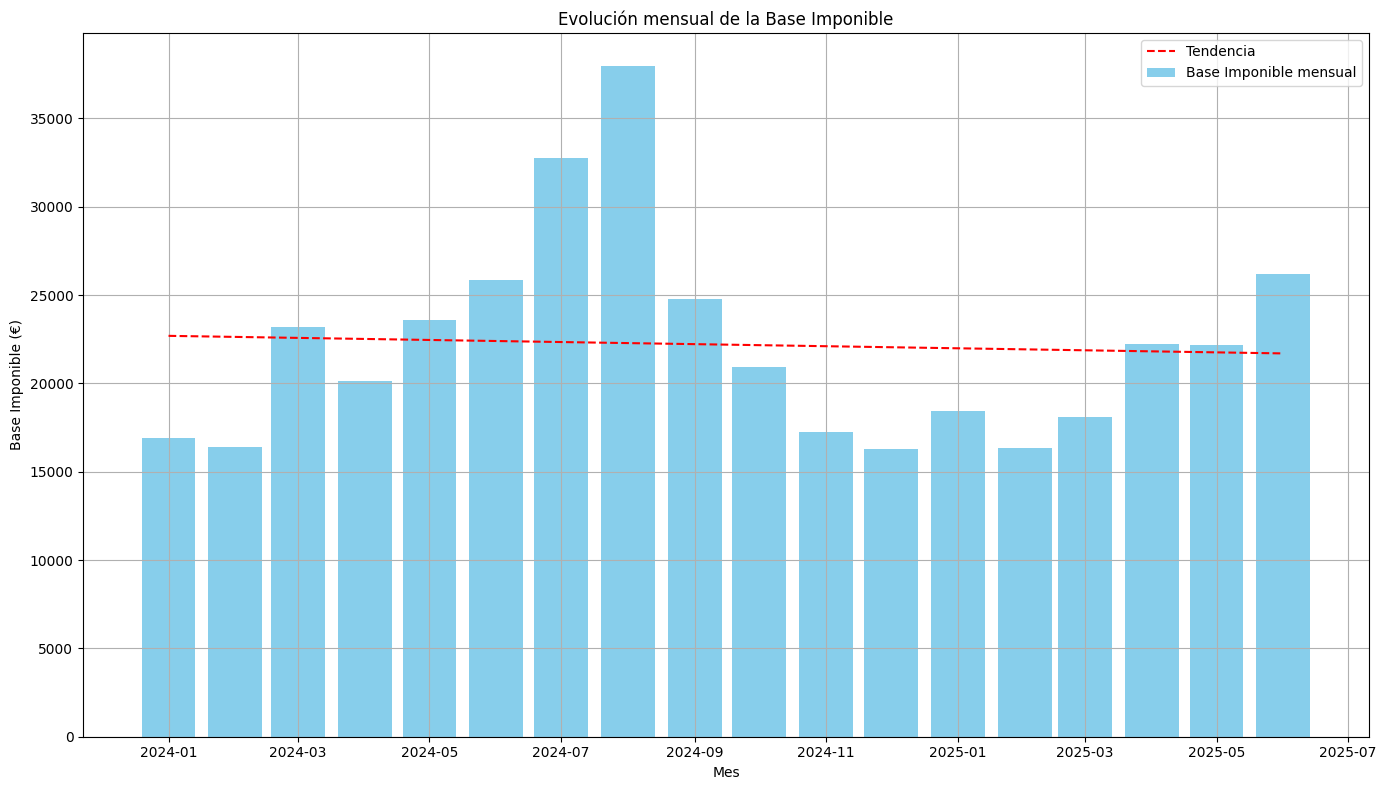

In [34]:
# Analizar el comportamiento mensual de la base imponible y graficar tendencia
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Crear columna de año-mes
df['fecha'] = pd.to_datetime(df['fecha']).dt.to_period('M').dt.to_timestamp()
# Agrupar por mes y sumar base imponible
df_ = df.groupby('mes', as_index=False)['base_imponible'].sum()
# Calcular la tendencia lineal
x = date2num(df_['mes'])
y = df_['base_imponible'].values
coeffs = np.polyfit(x, y, 1)
trend = np.poly1d(coeffs)(x)
# Graficar barras y línea de tendencia
plt.figure(figsize=(14,8))
bar_width = 25  # días, para que la barra cubra casi todo el mes
plt.bar(df_['mes'], df_['base_imponible'], width=bar_width, color='skyblue', label='Base Imponible mensual', align='center')
plt.plot(df_['mes'], trend, color='red', linestyle='--', label='Tendencia')
plt.xlabel('Mes')
plt.ylabel('Base Imponible (€)')
plt.title('Evolución mensual de la Base Imponible')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

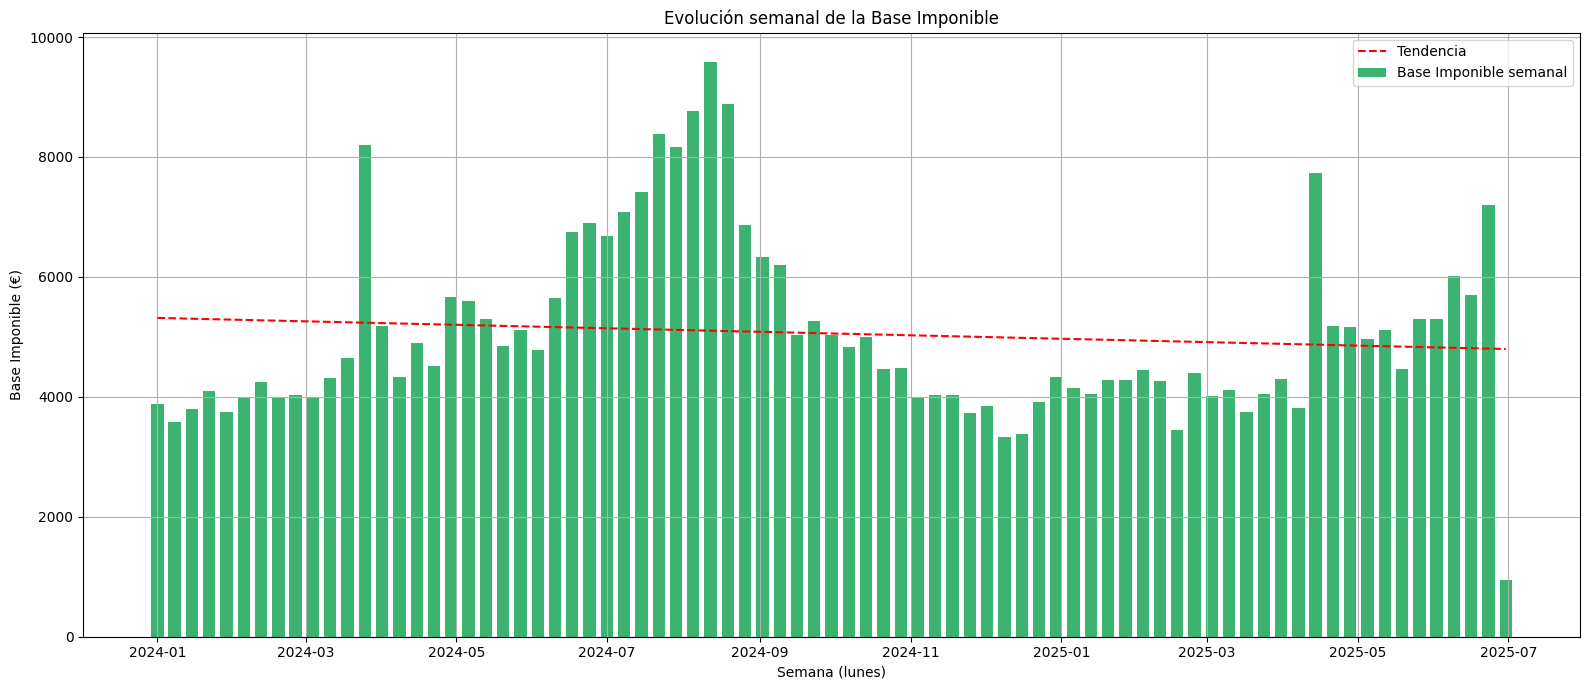

In [35]:
# Analizar el comportamiento semanal de la base imponible y graficar tendencia
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

# Crear columna de semana (lunes de cada semana)
df_fleca_semana['semana'] = pd.to_datetime(df_fleca_semana['fecha']) - pd.to_timedelta(pd.to_datetime(df_fleca_semana['fecha']).dt.weekday, unit='d')
# Agrupar por semana y sumar base imponible
df_fleca_weekly = df_fleca_semana.groupby('semana', as_index=False)['base_imponible'].sum()
# Calcular la tendencia lineal
x = date2num(df_fleca_weekly['semana'])
y = df_fleca_weekly['base_imponible'].values
coeffs = np.polyfit(x, y, 1)
trend = np.poly1d(coeffs)(x)
# Graficar barras y línea de tendencia
plt.figure(figsize=(16,7))
bar_width = 5  # días, para que la barra cubra casi toda la semana
plt.bar(df_fleca_weekly['semana'], df_fleca_weekly['base_imponible'], width=bar_width, color='mediumseagreen', label='Base Imponible semanal', align='center')
plt.plot(df_fleca_weekly['semana'], trend, color='red', linestyle='--', label='Tendencia')
plt.xlabel('Semana (lunes)')
plt.ylabel('Base Imponible (€)')
plt.title('Evolución semanal de la Base Imponible')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Gráfico interactivo semanal con Plotly
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=df_fleca_weekly['semana'], y=df_fleca_weekly['base_imponible'], name='Base Imponible semanal', marker_color='mediumseagreen'))
fig.add_trace(go.Scatter(x=df_fleca_weekly['semana'], y=trend, mode='lines', name='Tendencia', line=dict(color='red', dash='dash')) )
fig.update_layout(title='Evolución semanal de la Base Imponible (Interactivo)',
                  xaxis_title='Semana (lunes)',
                  yaxis_title='Base Imponible (€)',
                  legend=dict(x=0.01, y=0.99),
                  bargap=0.1,
                  height=600,
                  width=1200,
                  template='plotly_white')
fig.show()

# Análisis de la Tendencia de Ventas

Observamos algunos patrones clave:

**1. Tendencia anual cíclica**

Se observa un patrón de crecimiento sostenido hasta el tercer trimestre de cada año, seguido por una caída pronunciada en los últimos meses del año. Esto sugiere que las ventas tienen una fuerte estacionalidad con picos en meses específicos.


**2. Picos en los meses de verano, relacionados con el aumento del turismo en la zona.**

Semana Santa no está resaltada en la gráfica, pero podríamos esperar un aumento en esos meses. Vamos a verificar si los meses de marzo/abril muestran un comportamiento atípico.

También vemos picos en los meses de verano, lo cual está relacionado con un aumento en el turismo en Cambrils.

**3. Tendencia de ventas descendente**
La línea de tendencia de la base imponible muestra un comportamiento descendente a lo largo del período analizado. Esto indica que, a pesar de los picos estacionales, la base imponible presenta una disminución sostenida. Sería necesario investigar las posibles causas de esta tendencia, como cambios en el comportamiento del consumidor, variaciones en los precios, o factores externos como la competencia o la situación económica general.

**Próximo Paso: Descomposición de la Serie Temporal**

Para confirmar que la estacionalidad es clara y que podemos modelarla, realizaremos una descomposición de la serie en tendencia, estacionalidad y residuo. Esto nos ayudará a decidir el mejor modelo de forecasting.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba de Dickey-Fuller
result = adfuller(df_fleca_monthly['base_imponible'])

# Mostrar los resultados
print("Prueba de Dickey-Fuller:")
print(f"Estadístico ADF: {result[0]}")
print(f"P-valor: {result[1]}")
print("Valores Críticos:")
for key, value in result[4].items():
    print(f"{key}: {value}")

# Interpretación del resultado
if result[1] < 0.05:
    print("\n✅ La serie es estacionaria (podemos probar ARIMA).")
else:
    print("\n⚠️ La serie NO es estacionaria (necesitamos diferenciación o SARIMA).")


Prueba de Dickey-Fuller:
Estadístico ADF: -3.5462945932830543
P-valor: 0.006874771963187934
Valores Críticos:
1%: -3.9240193847656246
5%: -3.0684982031250003
10%: -2.67389265625

✅ La serie es estacionaria (podemos probar ARIMA).


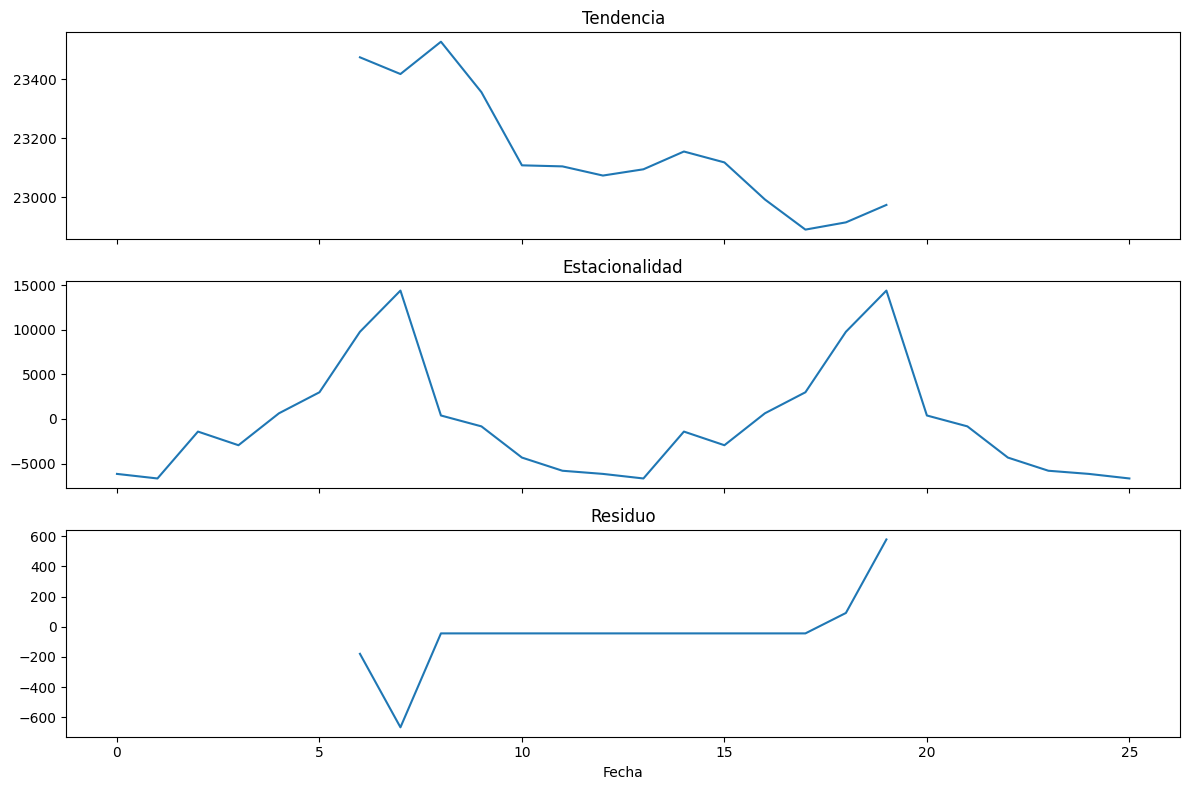

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie de tiempo
decomposition = seasonal_decompose(df_fleca_monthly['base_imponible'], model='additive', period=12)

# Graficar los componentes
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

decomposition.trend.plot(ax=axes[0], title="Tendencia")
decomposition.seasonal.plot(ax=axes[1], title="Estacionalidad")
decomposition.resid.plot(ax=axes[2], title="Residuo")

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


Se observa un patrón anual claro: los valores suben hasta mitad de año (verano) y luego bajan, lo cual sugiere estacionalidad fuerte por comportamiento del consumidor (establecimiento en zona turística).

**1. Tendencia**

Hay una tendencia ligeramente descendente desde mediados de 2023 hasta mediados de 2024, y luego una leve recuperación.

Se observan períodos de caída y recuperación, lo que indica posibles fluctuaciones estacionales.

**2. Estacionalidad**

El patrón estacional es claro y repetitivo:

Aumenta significativamente en los meses de verano (junio-agosto).

Disminuye en los primeros y últimos meses del año.

El comportamiento estacional parece consistente entre años, lo cual es muy útil para el forecasting.

**3. Residuo**

El residuo es bastante bajo, lo que indica que la mayor parte de la variabilidad está explicada por la tendencia y la estacionalidad.

No se observan outliers fuertes ni variaciones abruptas que rompan el modelo

**✅ Conclusión**

La serie es altamente estacional y predecible, con una leve tendencia negativa y residuos bajos. Es una muy buena candidata para modelos de forecasting basados en componentes como SARIMA, Prophet o modelos de ML con features temporales

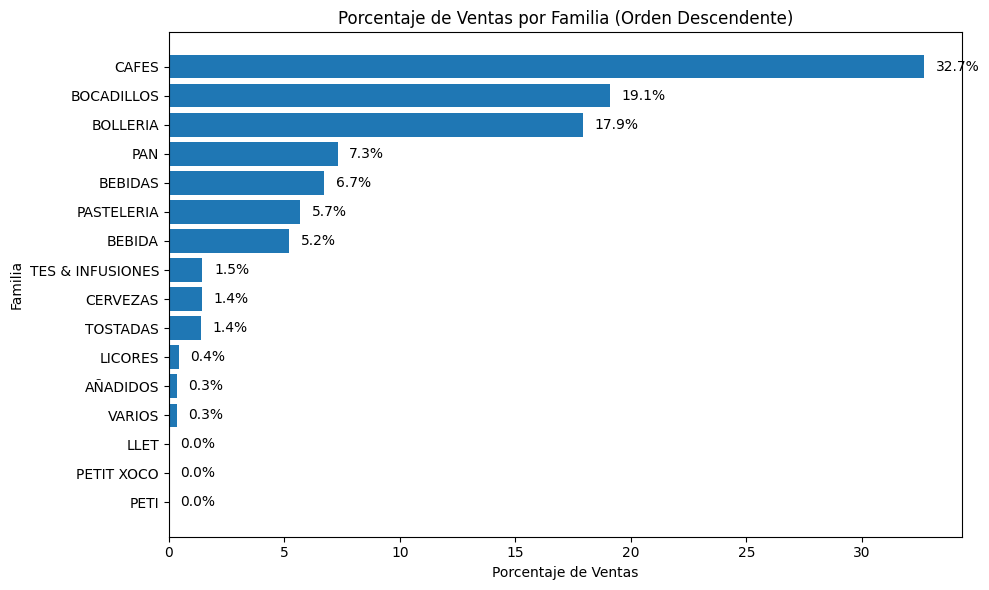

In [36]:
# Crear la gráfica de tendencia de las ventas

#  Calcular las ventas totales por familia
ventas_por_familia = df_fleca_monthly_family.groupby('familia')['total'].sum().reset_index()

# Calcular el porcentaje de ventas por familia
ventas_por_familia['porcentaje'] = (ventas_por_familia['total'] / ventas_por_familia['total'].sum()) * 100

#Ordenar el DataFrame por porcentaje de ventas
ventas_por_familia = ventas_por_familia.sort_values(by=['porcentaje'], ascending=True)

# Crear el gráfico de barras horizontal
import matplotlib.pyplot as plt

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(ventas_por_familia['familia'], ventas_por_familia['porcentaje'])  # Usamos barh para barras horizontales
plt.xlabel('Porcentaje de Ventas')
plt.ylabel('Familia')
plt.title('Porcentaje de Ventas por Familia (Orden Descendente)')

# Añadir etiquetas con el porcentaje en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()


CAFÉS, BOCADILLOS y BOLLERÍA representan el 69% de los ingresos.

<Figure size 1400x600 with 0 Axes>

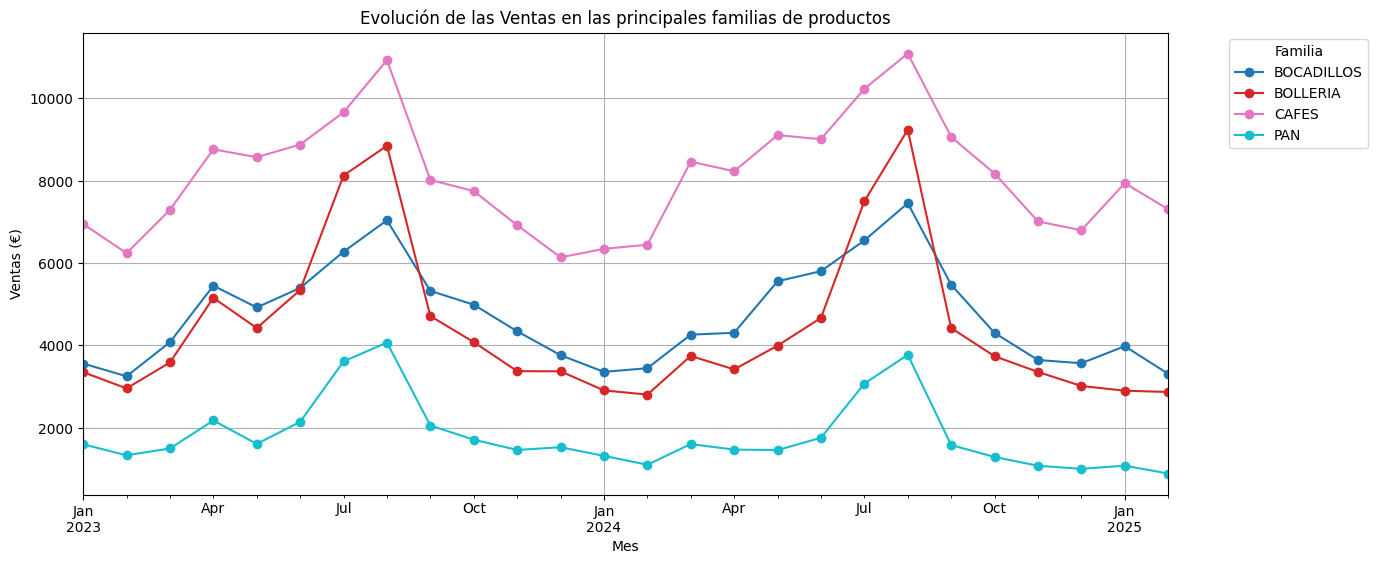

In [82]:
# Seleccionar las principales categorías según el análisis previo
familias_principales = ["CAFES", "BOCADILLOS", "BOLLERIA", "PAN"]

# Agregar ventas mensuales por categoría
df_familias_principales = df_fleca_monthly_family[df_fleca_monthly_family['familia'].isin(familias_principales)].groupby([df_fleca_monthly_family['mes'].dt.to_period("M"), 'familia'])['total'].sum().unstack()

# Convertir el índice a DatetimeIndex
df_familias_principales.index = df_familias_principales.index.to_timestamp()

# Graficar la evolución de ventas por categoría
plt.figure(figsize=(14, 6))
df_familias_principales.plot(kind="line", marker="o", figsize=(14,6), colormap="tab10")


plt.xlabel("Mes")
plt.ylabel("Ventas (€)")
plt.title("Evolución de las Ventas en las principales familias de productos")
plt.legend(title="Familia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

Las tres principales categorías siguen un patron estacional claro.
El pico de la categoría Bollería es más pronunciado en los meses de verano que el resto.

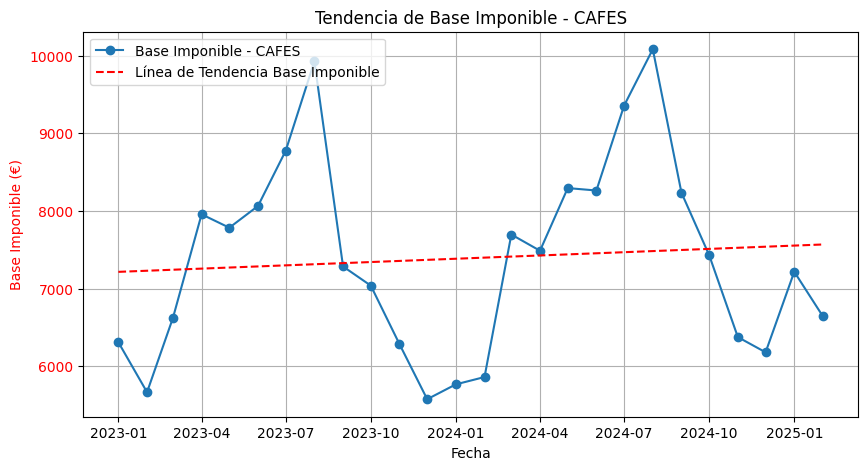

In [81]:
# Extraer la serie de base imponible para "CAFES" desde cafes_data
cafes = cafes_data.set_index('mes')["base_imponible"]
dates = cafes.index

# Convertir las fechas a números para ajustar la tendencia
x = date2num(dates)
y = cafes.values

# Ajustar una línea recta (tendencia) a los datos de base imponible
coeffs = np.polyfit(x, y, 1)
trend = np.poly1d(coeffs)(x)

plt.figure(figsize=(10, 5))
ax1 = plt.gca()
ax1.plot(dates, y, marker='o', label='Base Imponible - CAFES')
ax1.plot(dates, trend, linestyle='--', color='red', label='Línea de Tendencia Base Imponible')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Base Imponible (€)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
plt.title('Tendencia de Base Imponible - CAFES')
ax1.grid(True)
ax1.legend(loc='upper left')


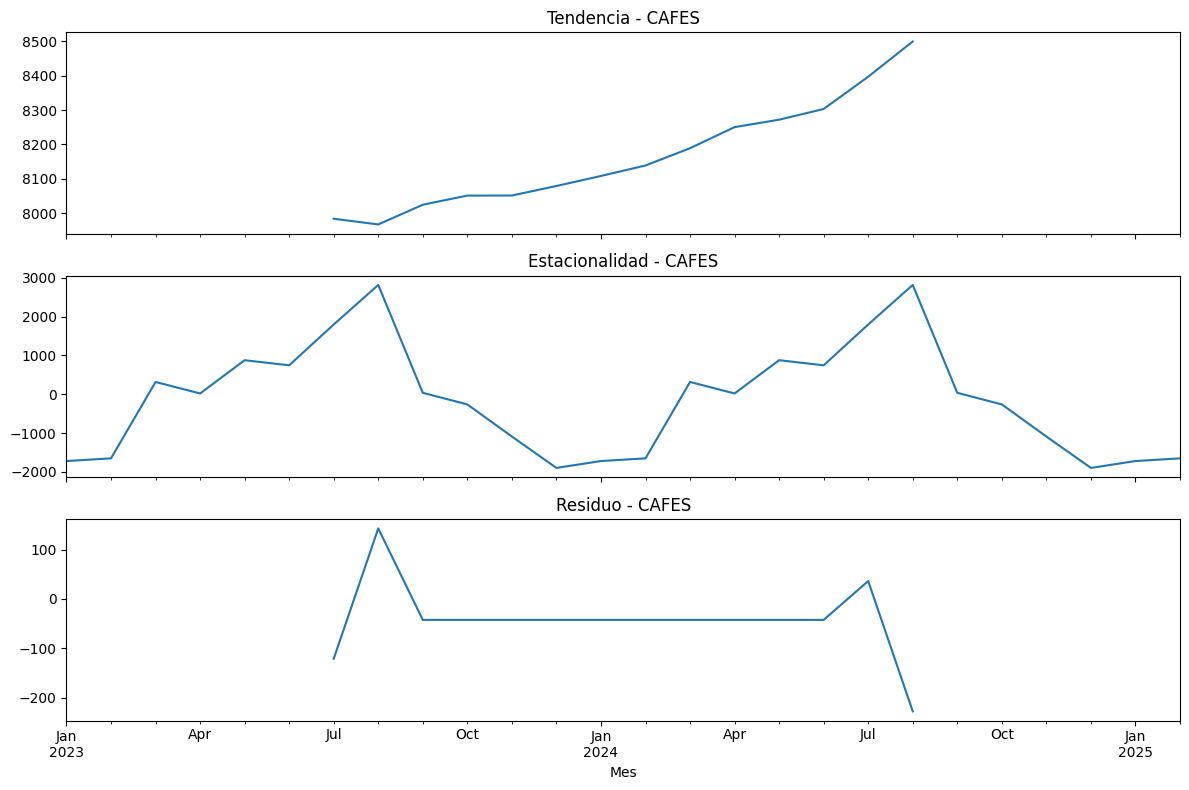

In [65]:
# Descomponer la serie de tiempo para la familia CAFES
decomposition_cafes = seasonal_decompose(cafes, model='additive', period=12)

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

decomposition_cafes.trend.plot(ax=axes[0], title="Tendencia - CAFES")
decomposition_cafes.seasonal.plot(ax=axes[1], title="Estacionalidad - CAFES")
decomposition_cafes.resid.plot(ax=axes[2], title="Residuo - CAFES")

plt.xlabel("Mes")
plt.tight_layout()
plt.show()


**1. Tendencia**

Se observa un comportamiento globalmente ascendente con ligeras fluctuaciones.

Indica que, a lo largo del tiempo analizado (aprox. de enero de 2023 a inicios de 2025), el valor de “CAFES” tiende a incrementar.

**2. Estacionalidad (gráfico intermedio)**

Muestra variaciones cíclicas que se repiten en ciertos periodos (por ejemplo, picos positivos y negativos que van de alrededor de +2000 a -2000).

Esto sugiere que hay meses o trimestres en los que la variable “CAFES” es consistentemente más alta (fase positiva) y otros en los que cae (fase negativa).

La forma y la amplitud de estos picos indican la fuerza y el patrón de la estacionalidad.

**3. Residuo (gráfico inferior)**

Se mueve alrededor de cero, aunque con algunos saltos puntuales.

El hecho de que no presente grandes oscilaciones (excepto por algunos picos específicos) sugiere que la mayoría de la variabilidad está explicada por la tendencia y la estacionalidad, y que los “ruidos” o efectos no explicados son relativamente pequeños o esporádicos.

**En conjunto, la descomposición sugiere que:**

* Hay un crecimiento a largo plazo (tendencia al alza).

* Existen fluctuaciones estacionales marcadas que se asocian a los meses con mayor o menor demanda/producción.

* El residuo no muestra una estructura clara, lo cual es deseable en un buen ajuste, ya que implica que la mayor parte de la señal se captura con la tendencia y la estacionalidad.

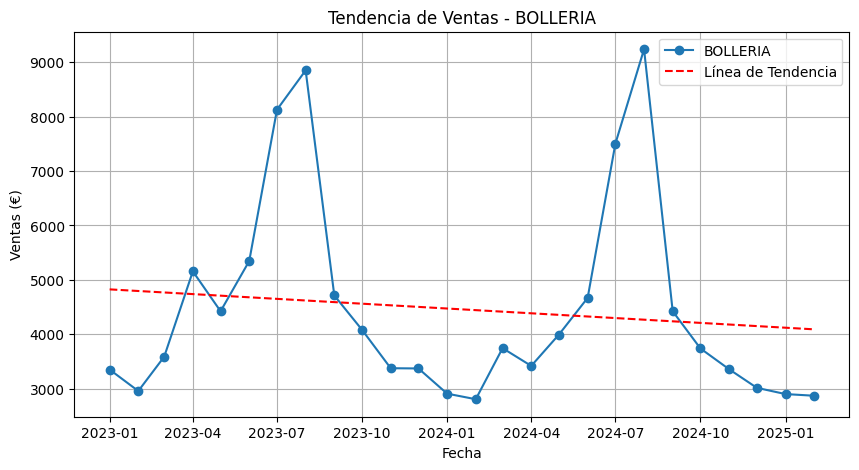

In [50]:
# Extraer la serie de ventas para "BOLLERIA"
bolleria = df_categorias_principales["BOLLERIA"]
dates = df_categorias_principales.index

# Convertir fechas a números para el ajuste de la línea
x = date2num(dates)
y = bolleria.values

# Ajustar una línea recta (tendencia) a los datos
coeffs = np.polyfit(x, y, 1)
trend = np.poly1d(coeffs)(x)

# Graficar la serie y la línea de tendencia
plt.figure(figsize=(10, 5))
plt.plot(dates, y, marker='o', label='BOLLERIA')
plt.plot(dates, trend, linestyle='--', color='red', label='Línea de Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Ventas (€)')
plt.title('Tendencia de Ventas - BOLLERIA')
plt.legend()
plt.grid(True)
plt.show()

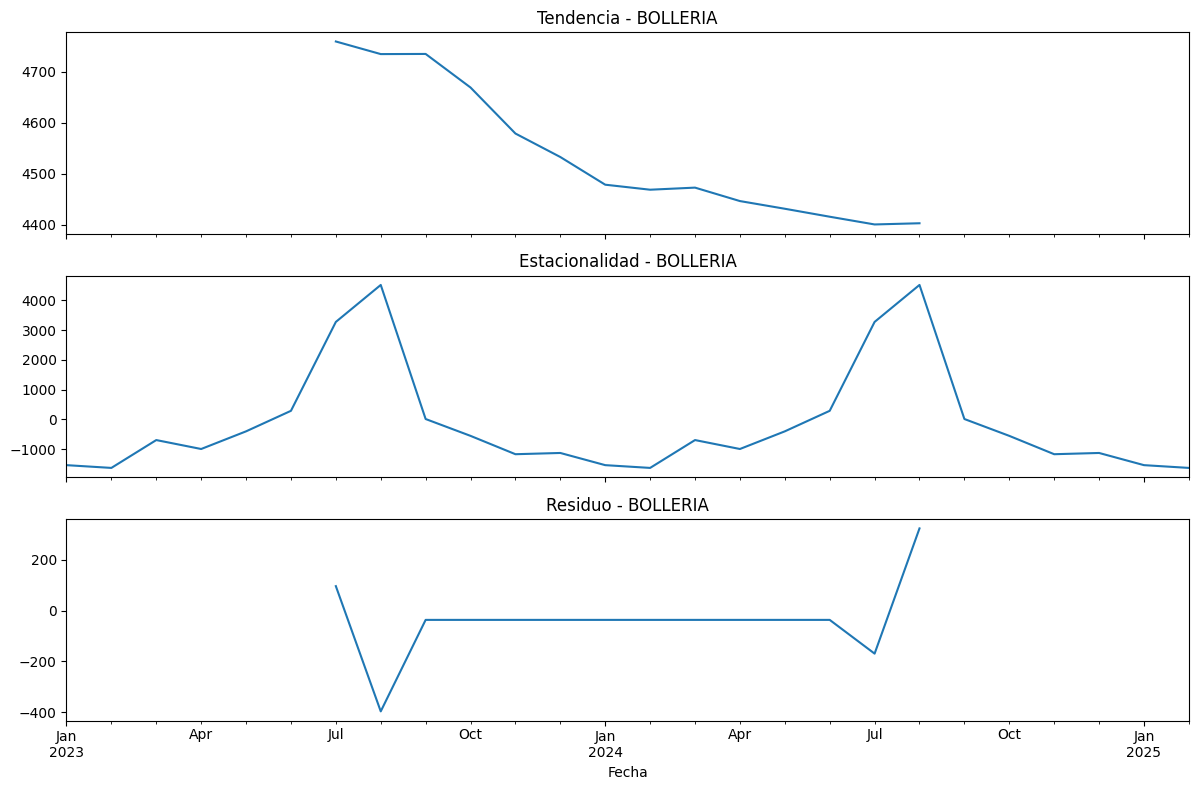

In [64]:
# Descomponer la serie de tiempo para la familia BOLLERIA
decomposition_bolleria = seasonal_decompose(bolleria, model='additive', period=12)

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

decomposition_bolleria.trend.plot(ax=axes[0], title="Tendencia - BOLLERIA")
decomposition_bolleria.seasonal.plot(ax=axes[1], title="Estacionalidad - BOLLERIA")
decomposition_bolleria.resid.plot(ax=axes[2], title="Residuo - BOLLERIA")

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()

**1. Tendencia (gráfico superior)**

Muestra un descenso a lo largo del periodo (aproximadamente desde enero de 2023 hasta inicios de 2025).

Esto indica que, a nivel global y dejando a un lado la estacionalidad y la variabilidad puntual, la serie de “BOLLERIA” tiende a reducir sus valores con el paso del tiempo.

**2. Estacionalidad (gráfico intermedio)**

Se observan picos bastante pronunciados (con valores que podrían superar los +3000) y mínimos que rondan valores negativos o cercanos a -1000.

Esto sugiere que existen períodos (por ejemplo, en meses centrales del año) en los que la demanda o producción de “BOLLERIA” es mucho mayor, y otros en los que cae de forma significativa.

La amplitud de estos picos es notable, lo cual indica una estacionalidad fuerte.

**3. Residuo (gráfico inferior)**

Se mantiene mayoritariamente en torno a cero, con algunos picos positivos y negativos moderados.

Esto implica que la mayor parte de la variación de la serie se explica por la tendencia y la estacionalidad, dejando pocas fluctuaciones al azar o sin explicar.

**En conjunto, la serie de “BOLLERIA” muestra:**

Una tendencia descendente a largo plazo.

Una estacionalidad marcada, con oscilaciones amplias entre periodos altos y bajos.

Un residuo relativamente pequeño, lo que indica un buen ajuste de la descomposición a los datos.








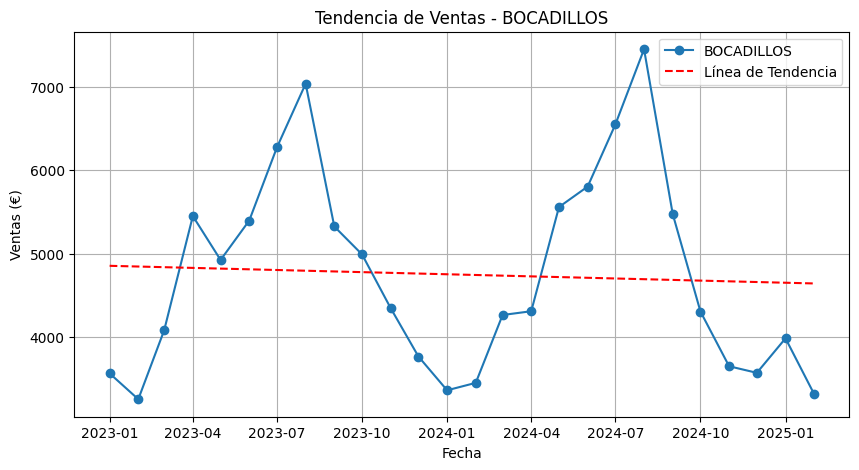

In [70]:
# Extraer la serie de ventas para "BOCADILLOS"
bocadillos = df_categorias_principales["BOCADILLOS"]
dates = df_categorias_principales.index

# Convertir fechas a números para el ajuste de la línea
x = date2num(dates)
y = bocadillos.values

# Ajustar una línea recta (tendencia) a los datos
coeffs = np.polyfit(x, y, 1)
trend = np.poly1d(coeffs)(x)

# Graficar la serie y la línea de tendencia
plt.figure(figsize=(10, 5))
plt.plot(dates, y, marker='o', label='BOCADILLOS')
plt.plot(dates, trend, linestyle='--', color='red', label='Línea de Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Ventas (€)')
plt.title('Tendencia de Ventas - BOCADILLOS')
plt.legend()
plt.grid(True)
plt.show()

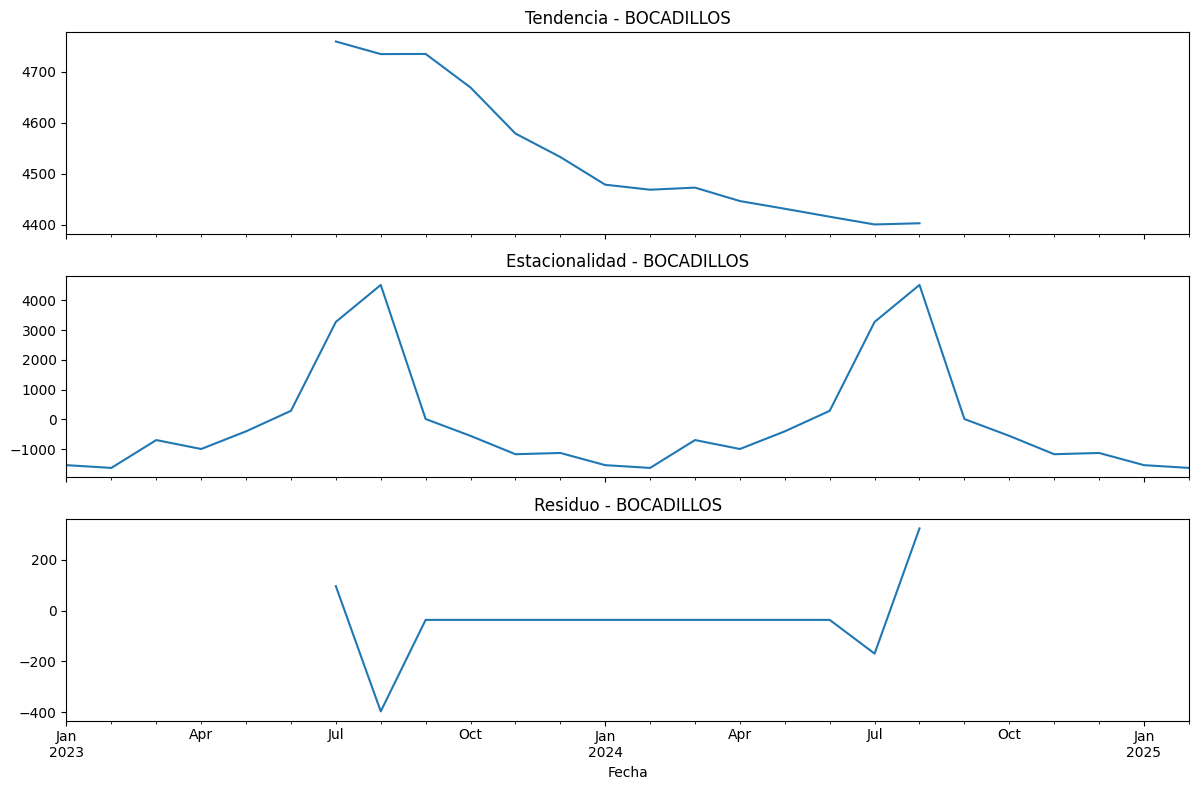

In [75]:
# Descomponer la serie de tiempo para la familia BOCADILLOS
decomposition_bocadillos = seasonal_decompose(bolleria, model='additive', period=12)

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

decomposition_bocadillos.trend.plot(ax=axes[0], title="Tendencia - BOCADILLOS")
decomposition_bocadillos.seasonal.plot(ax=axes[1], title="Estacionalidad - BOCADILLOS")
decomposition_bocadillos.resid.plot(ax=axes[2], title="Residuo - BOCADILLOS")

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()

**1. Tendencia (gráfico superior)**

La curva presenta un descenso a lo largo del periodo (desde inicios de 2023 hasta inicios de 2025).

Esto indica que, en promedio y a largo plazo, “BOCADILLOS” tiende a disminuir sus valores, independientemente de las fluctuaciones estacionales.

**2. Estacionalidad (gráfico intermedio)**

Se observan picos positivos altos (que rondan valores de +4000) y períodos con valores cercanos a -1000.

Esto implica una estacionalidad bastante marcada, con meses o períodos del año donde los valores de “BOCADILLOS” son significativamente más altos que el promedio y otros donde se sitúan por debajo.

**3. Residuo (gráfico inferior)**

La mayor parte de los valores oscila alrededor de cero, con algunos saltos más notables en determinados puntos.

Esto sugiere que la tendencia y la estacionalidad capturan gran parte de la variabilidad de la serie, dejando un residuo relativamente pequeño.

**En conjunto, la serie de “BOCADILLOS” muestra:**

* Una tendencia general decreciente.

* Una estacionalidad fuerte, con picos y valles bien definidos a lo largo del año.

* Un residuo en torno a cero, reflejando que la descomposición de la serie (tendencia + estacionalidad) explica la mayor parte de la variabilidad.